## **PRCP-1025-FlightPricePrediction**

<b>This is the main notebook for the flight price prediction project. We predict ticket prices for upcoming flights to help customers in selecting the optimum time for travel and the cheapest flight to the desired destination. </b>

## Importing essential libraries

In [1]:
# numpy and pandas for data manipulation
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# display plots on the notebook itself
%matplotlib inline

# To suppress the warnings 
import warnings
warnings.filterwarnings('ignore')

# File system manangement
import os

#Calling pandas function to display maximum rows and columns
pd.set_option("display.max_rows", None, "display.max_columns", None, "display.max_colwidth", None)

## Reading the CSV file

In [2]:
# Read/load data Flight_Fare.xlsx
Flight_data=pd.read_excel('Flight_Fare.xlsx')


# Task 1   Exploratory Data Analysis

## Basic insights of the data 

In [3]:
#Exploring first five rows of the data
Flight_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
# Get the dimensions (number of rows and columns) of the Flight_data DataFrame
Flight_data.shape

(10683, 11)

In [5]:
#displaying information about flight data.
Flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
#summarize the numerical values.
Flight_data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


## Checking  for  the null values in the dataframe
    

In [7]:
#calculates the sum of missing (null) values in each column of the DataFrame
Flight_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

## Checking for duplicates in the dataframe

In [8]:
# Count and print the number of duplicates in the Flight_data DataFrame
print('The no of duplicates in the data:',Flight_data.duplicated().sum())

The no of duplicates in the data: 220


In [9]:
#removes duplicate rows from the DataFrame Flight_data and modifies it in place
Flight_data.drop_duplicates(inplace=True)

In [10]:
# Recheck to ensure the number of duplicates
print('The no of duplicates in the data:',Flight_data.duplicated().sum())

The no of duplicates in the data: 0


# Uni variate Analysis

### How many flights does each airline have?

<Axes: xlabel='Airline', ylabel='count'>

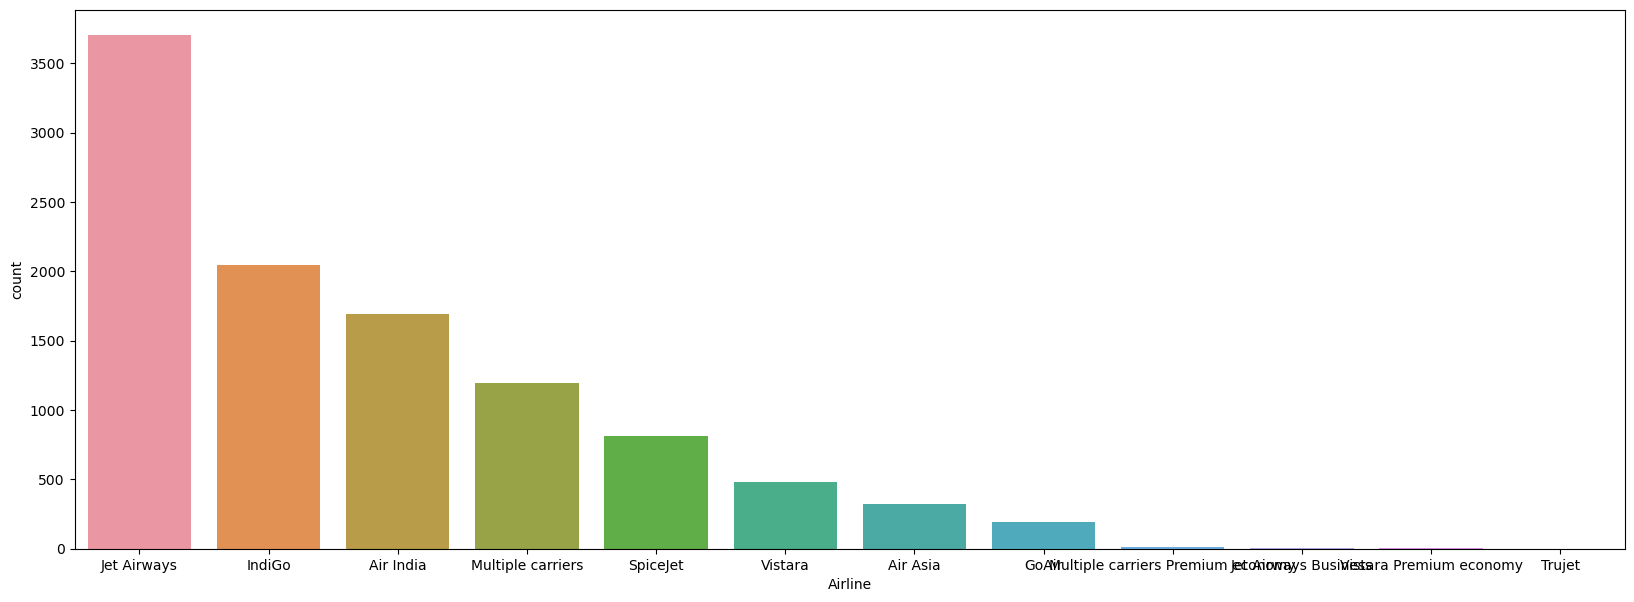

In [11]:
# Create a countplot to visualize airline distribution
plt.figure(figsize=(20, 7))  # Set the figure size for the plot
sns.countplot(x=Flight_data['Airline'], order=Flight_data['Airline'].value_counts().index)


In [12]:
# Count the occurrences of each airline in the 'Airline' column
airline_counts = Flight_data['Airline'].value_counts()
print(airline_counts)

Jet Airways                          3700
IndiGo                               2043
Air India                            1695
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


# Distribution of Ticket Prices

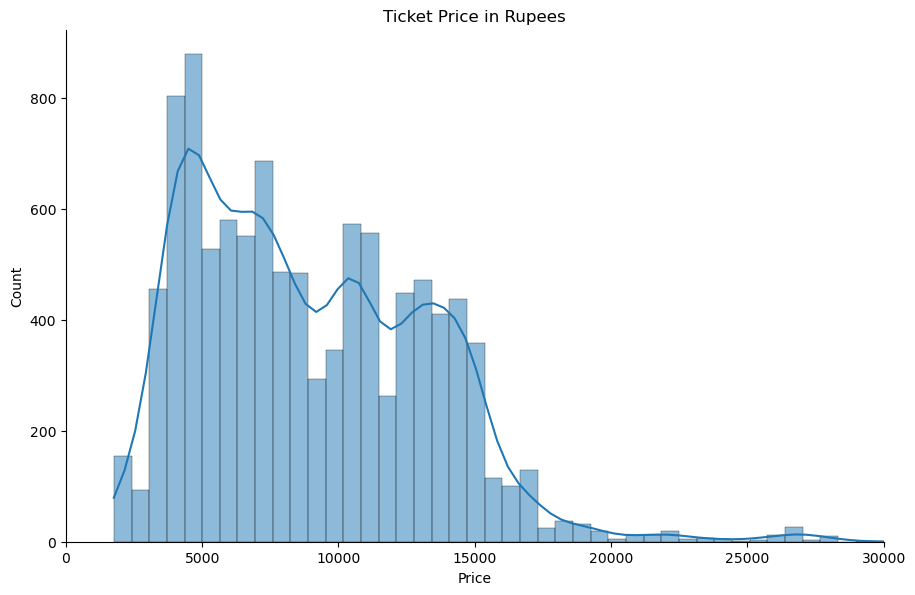

In [13]:
# Create a distribution plot of ticket prices
ticket_price = sns.displot(x=Flight_data['Price'], data=Flight_data, kde=True)

# Set the title of the plot
plt.title('Ticket Price in Rupees')

# Set the width and height of the figure
ticket_price.fig.set_figwidth(10)
ticket_price.fig.set_figheight(6)

# Set the x-axis limits to focus on a specific range of ticket prices
ticket_price.set(xlim=(0, 30000))


## Busiest Air Routes

In [14]:
# Count the number of occurrences of each unique route and reset the index
route_counts = Flight_data['Route'].value_counts().reset_index()

# Set the 'index' column as the new index of the DataFrame
busy_routes = route_counts.set_index('index')

# Display the first few rows of the DataFrame
busy_routes.head()


,Route
index,
DEL → BOM → COK,2376
BLR → DEL,1536
CCU → BOM → BLR,979
CCU → BLR,724
BOM → HYD,621


# Airports with most number of flights.

<Axes: xlabel='Source', ylabel='count'>

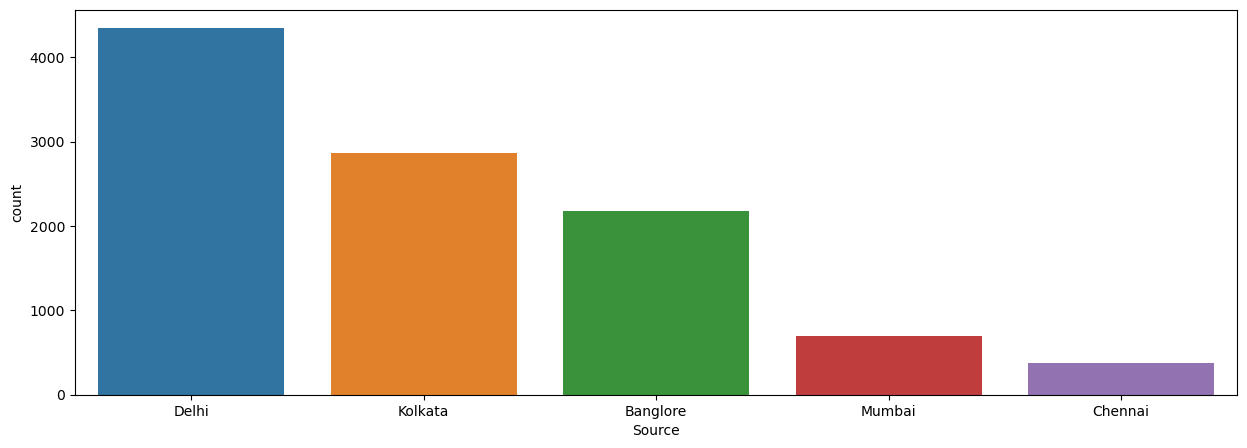

In [15]:
# Create a countplot to visualize flight sources distribution
plt.figure(figsize=(15, 5))  # Set the figure size for the plot
sns.countplot(x=Flight_data['Source'], order=Flight_data['Source'].value_counts().index)


# Bi Variate Analysis

## Airline Vs Price

<Axes: xlabel='Airline', ylabel='Price'>

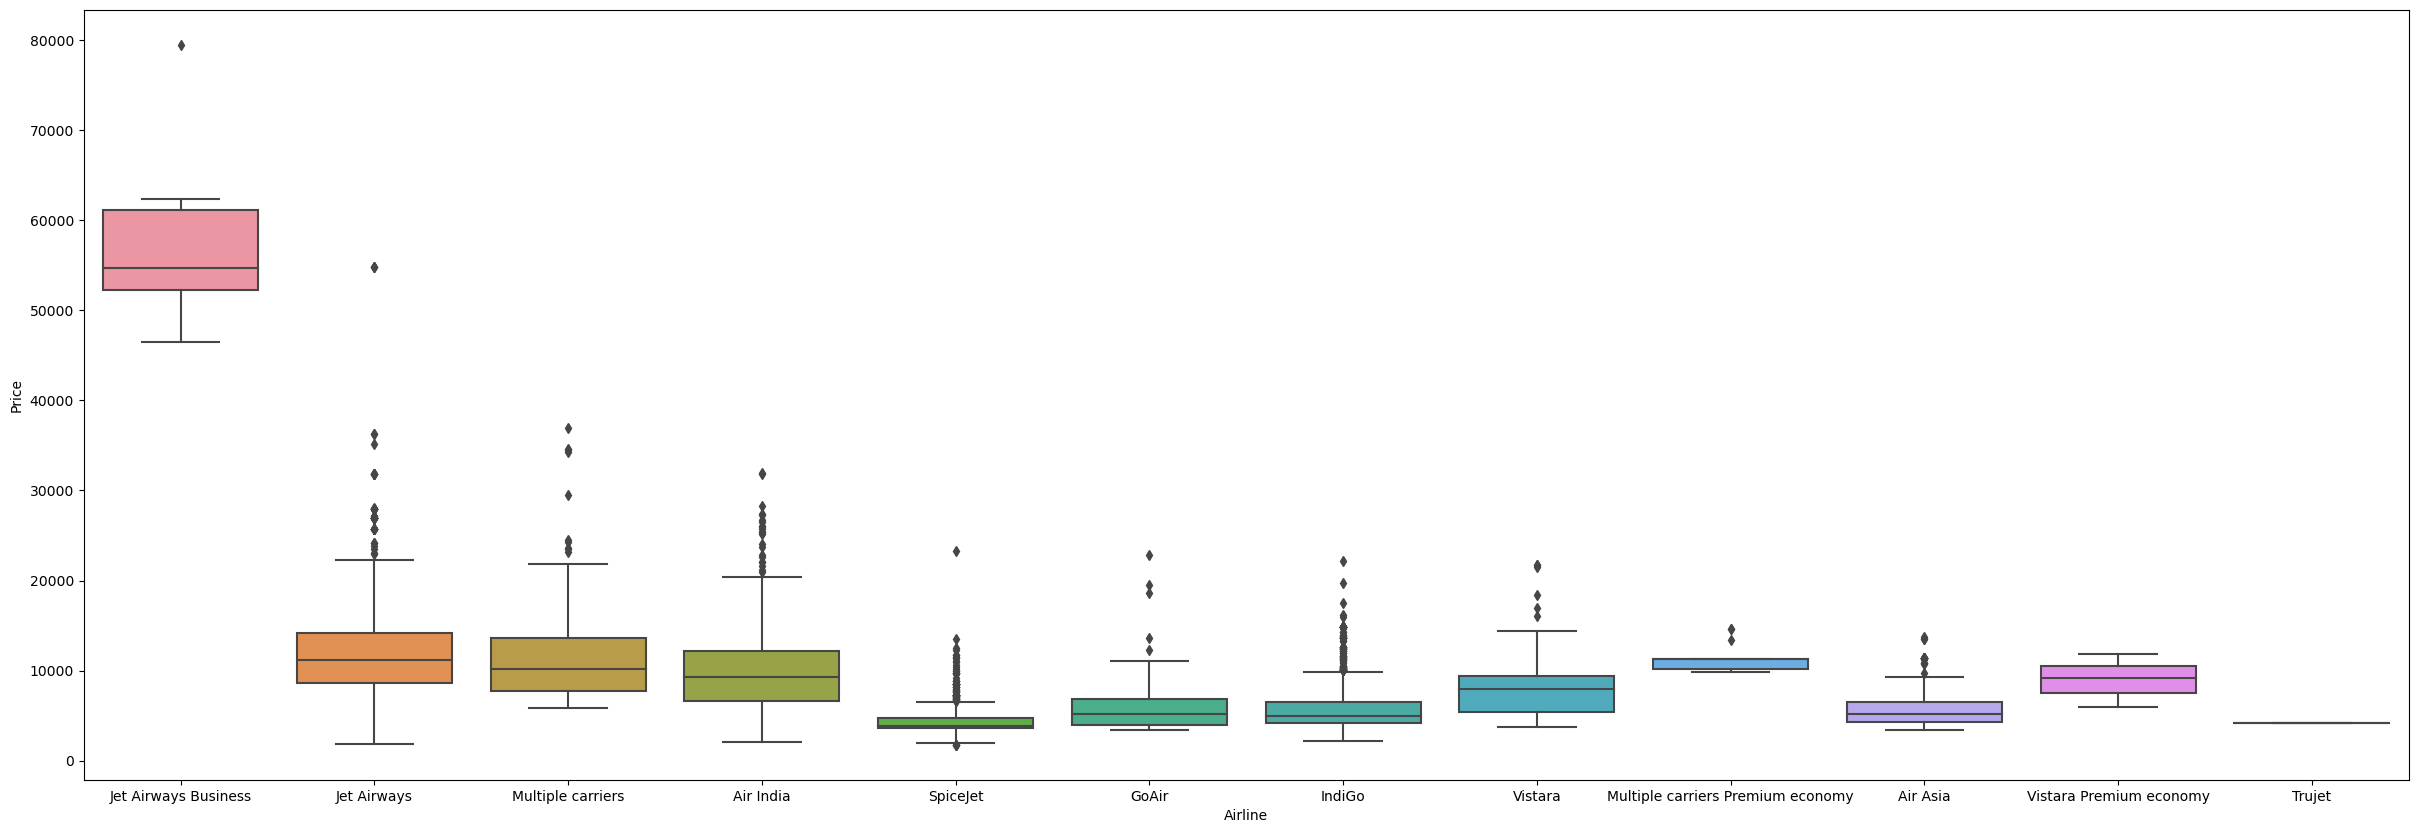

In [16]:
# Create a boxplot to visualize ticket price distribution by airline
plt.figure(figsize=(30, 10))  # Set the figure size for the plot

# Use sns.boxplot to create the boxplot
sns.boxplot(x='Airline', y='Price', data=Flight_data.sort_values('Price', ascending=False))


<Axes: xlabel='Airline', ylabel='Price'>

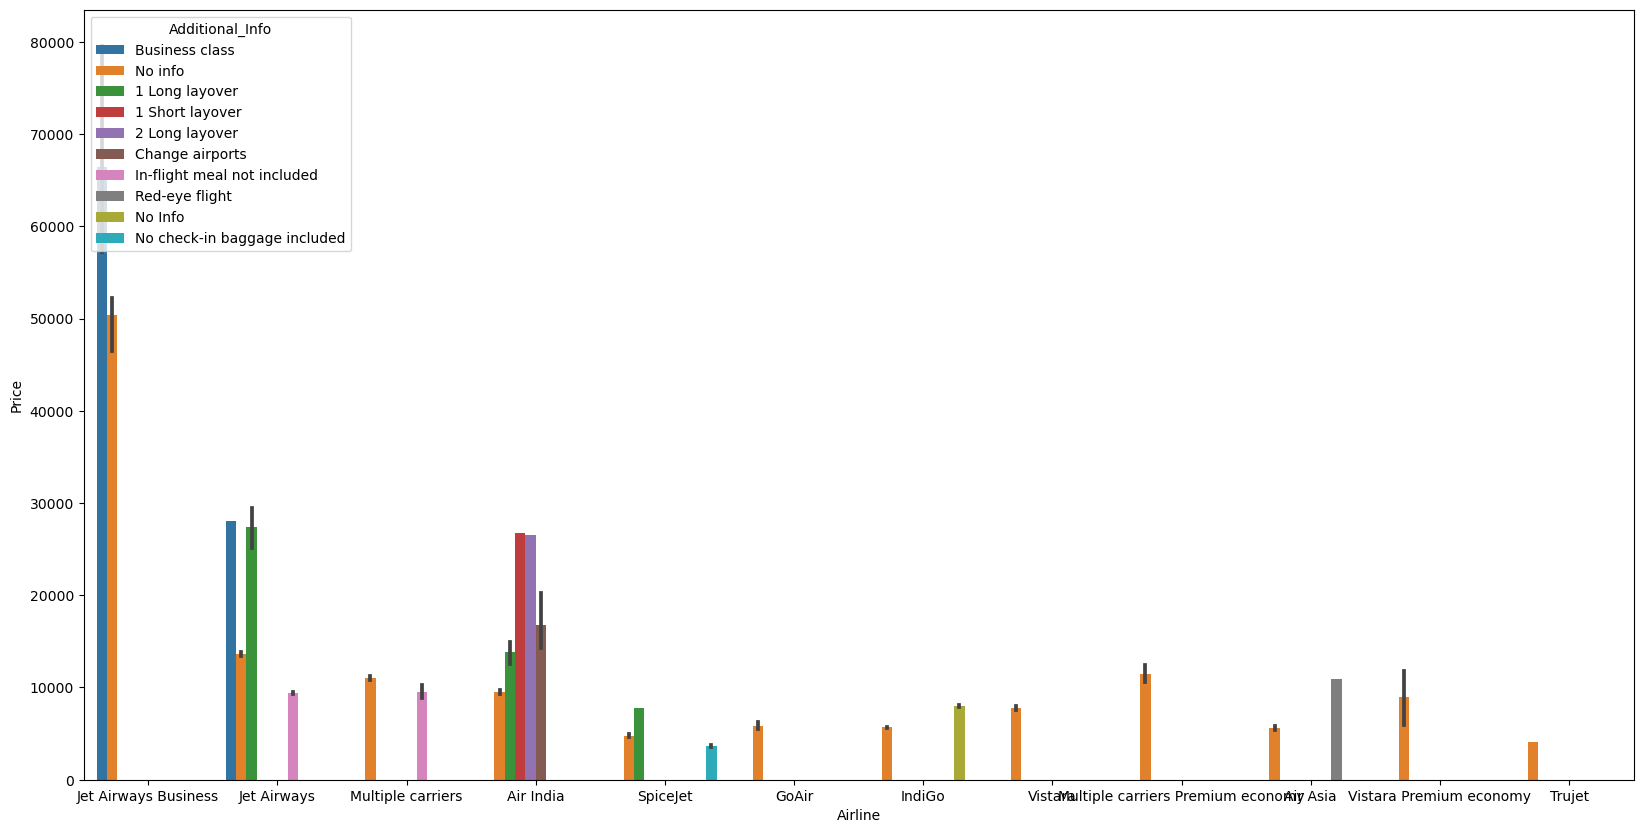

In [17]:
# Set the figure size to 20 units in width and 10 units in height
plt.figure(figsize=(20, 10))

# Create a seaborn barplot, plotting 'Price' on the y-axis, 'Airline' on the x-axis,
# and using 'Additional_Info' for color differentiation, while sorting data by price in descending order
sns.barplot(x='Airline', y='Price', hue="Additional_Info", data=Flight_data.sort_values('Price', ascending=False))


<Axes: xlabel='Airline', ylabel='Price'>

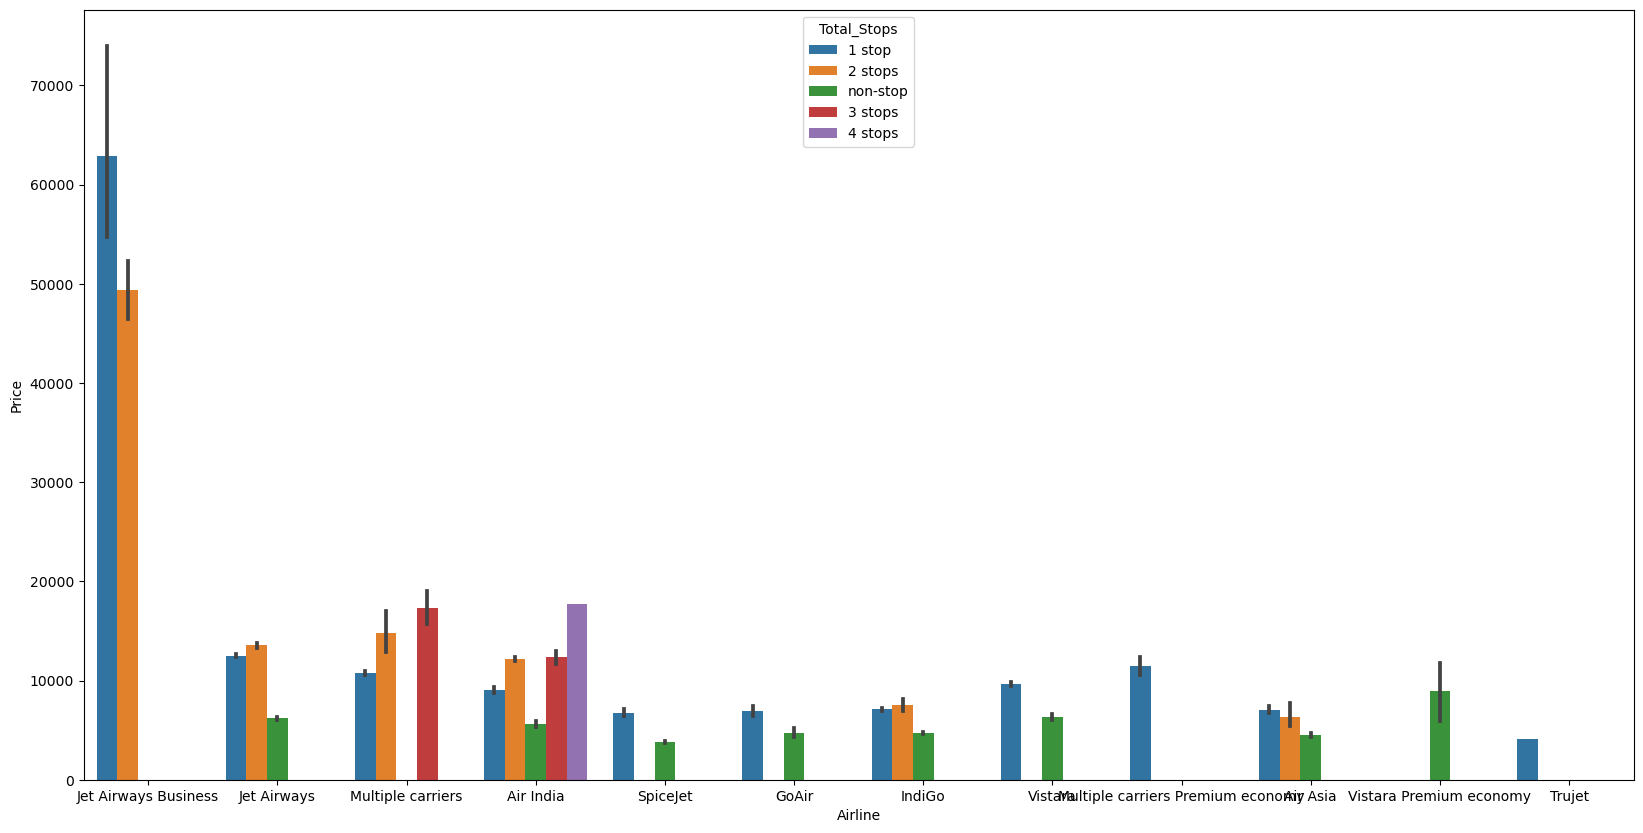

In [18]:
# Set the size of the matplotlib figure to 20 units in width and 10 units in height
plt.figure(figsize=(20, 10))

# Create a seaborn barplot with 'Airline' on the x-axis, 'Price' on the y-axis,
# and using 'Total_Stops' for color differentiation. Data is sorted by price in descending order.
sns.barplot(x='Airline', y='Price', hue="Total_Stops", data=Flight_data.sort_values('Price', ascending=False))


Observations:

-Only AirIndia Airlines has four total stops.

-Carriers flights have only one stop.

# Source vs Price

In [19]:
#calculates and returns the count of unique values in the 'Source' column of the Flight_data
Flight_data['Source'].value_counts()

Delhi       4346
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<Axes: xlabel='Source', ylabel='Price'>

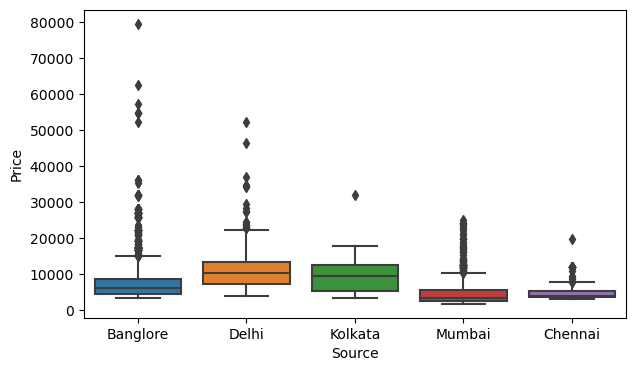

In [20]:
# Create a boxplot to visualize ticket price distribution by source
plt.figure(figsize=(7, 4))  # Set the figure size for the plot

# Use sns.boxplot to create the boxplot
sns.boxplot(x='Source', y='Price', data=Flight_data.sort_values('Price', ascending=False))


<Axes: xlabel='Source', ylabel='Price'>

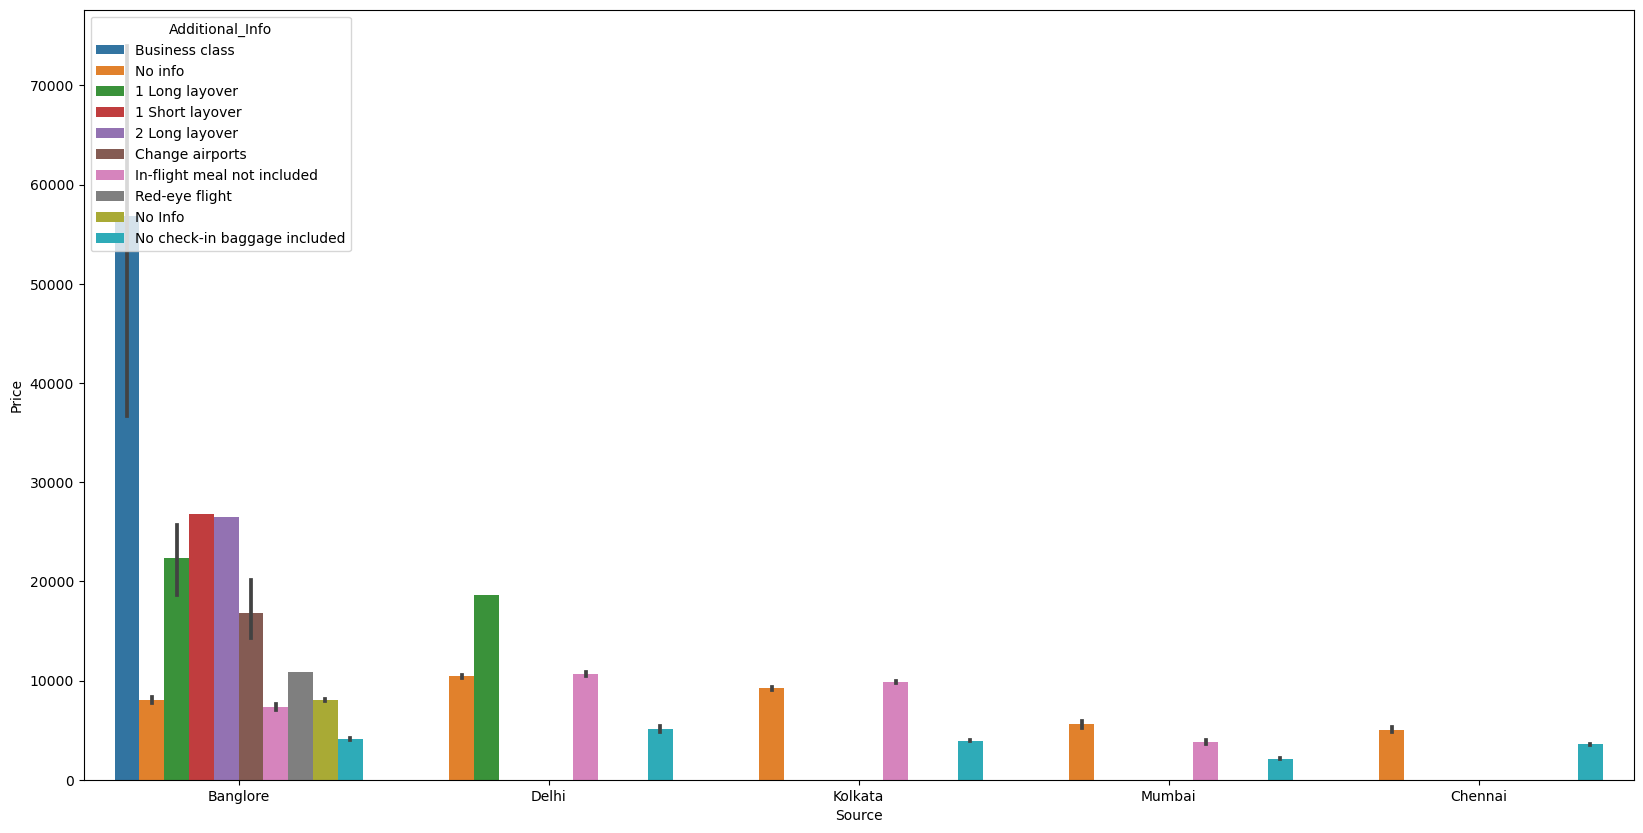

In [21]:
# Set the size of the matplotlib figure to 20 units in width and 10 units in height
plt.figure(figsize=(20, 10))

# Create a seaborn barplot with 'Source' on the x-axis, 'Price' on the y-axis,
# and using 'Additional_Info' for color differentiation. Data is sorted by price in descending order.
sns.barplot(x='Source', y='Price', hue="Additional_Info", data=Flight_data.sort_values('Price', ascending=False))


Observations:
-People who have additional information mentioned as business class traveled from the source 'Bangalore'.
-

<Axes: xlabel='Source', ylabel='Price'>

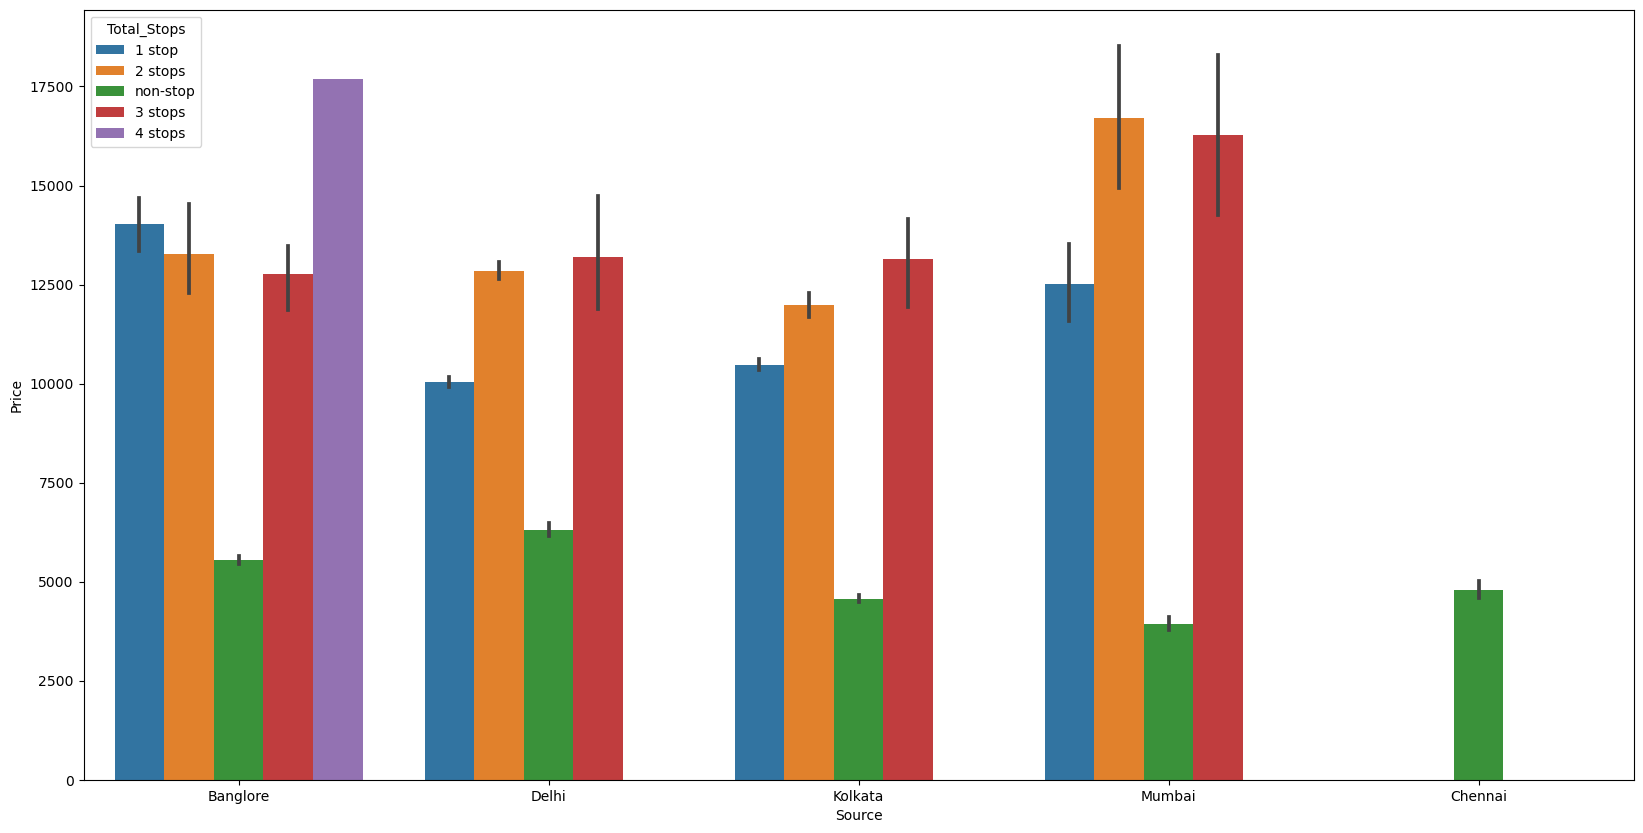

In [22]:
# Set the size of the matplotlib figure to 20 units in width and 10 units in height
plt.figure(figsize=(20, 10))

# Create a seaborn barplot with 'Source' on the x-axis, 'Price' on the y-axis,
# and using 'Total_Stops' for color differentiation. Data is sorted by price in descending order.
sns.barplot(x='Source', y='Price', hue="Total_Stops", data=Flight_data.sort_values('Price', ascending=False))


# Feature selection and Feature Engineering

<b> From description we can see that Date_of_Journey is a object data type, Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction</b>

In [23]:
# Extract and store the day of the month from the 'Date_of_Journey' column as 'Journey_day'.
Flight_data["Journey_day"] = pd.to_datetime(Flight_data.Date_of_Journey, format="%d/%m/%Y").dt.day

# Extract and store the month from the 'Date_of_Journey' column as 'Journey_month'.
Flight_data["Journey_month"] = pd.to_datetime(Flight_data["Date_of_Journey"], format="%d/%m/%Y").dt.month


In [24]:
Flight_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [25]:
# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.

Flight_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [26]:
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours from Dep_Time
Flight_data["Dep_hour"] = pd.to_datetime(Flight_data["Dep_Time"]).dt.hour

# Extracting Minutes Dep_Time
Flight_data["Dep_min"] = pd.to_datetime(Flight_data["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
Flight_data.drop(["Dep_Time"], axis = 1, inplace = True)

In [27]:
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
Flight_data["Arrival_hour"] = pd.to_datetime(Flight_data.Arrival_Time).dt.hour

# Extracting Minutes
Flight_data["Arrival_min"] = pd.to_datetime(Flight_data.Arrival_Time).dt.minute



In [28]:
# Now we can drop Arrival_Time as it is of no use
Flight_data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [29]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(Flight_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [30]:
# Adding duration_hours and duration_mins list to train_data dataframe

Flight_data["Duration_hours"] = duration_hours
Flight_data["Duration_mins"] = duration_mins
Flight_data.drop(["Duration"], axis = 1, inplace = True)

### Handling Categorical Data

### Label Encoding converting categorical variables to numeric

In [31]:
# Encode categorical columns in Flight_data using LabelEncoder for machine learning modeling

from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()

Flight_data.Airline=lc.fit_transform(Flight_data.Airline)
Flight_data.Source=lc.fit_transform(Flight_data.Source)
Flight_data.Destination=lc.fit_transform(Flight_data.Destination)
Flight_data.Route=lc.fit_transform(Flight_data.Route)
Flight_data.Total_Stops=lc.fit_transform(Flight_data.Total_Stops)
Flight_data.Additional_Info=lc.fit_transform(Flight_data.Additional_Info)

In [32]:
Flight_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,3,0,5,18,4,8,3897,24,3,22,20,1,10,2,50
1,1,3,0,84,1,8,7662,1,5,5,50,13,15,7,25
2,4,2,1,118,1,8,13882,9,6,9,25,4,25,19,0
3,3,3,0,91,0,8,6218,12,5,18,5,23,30,5,25
4,3,0,5,29,0,8,13302,1,3,16,50,21,35,4,45


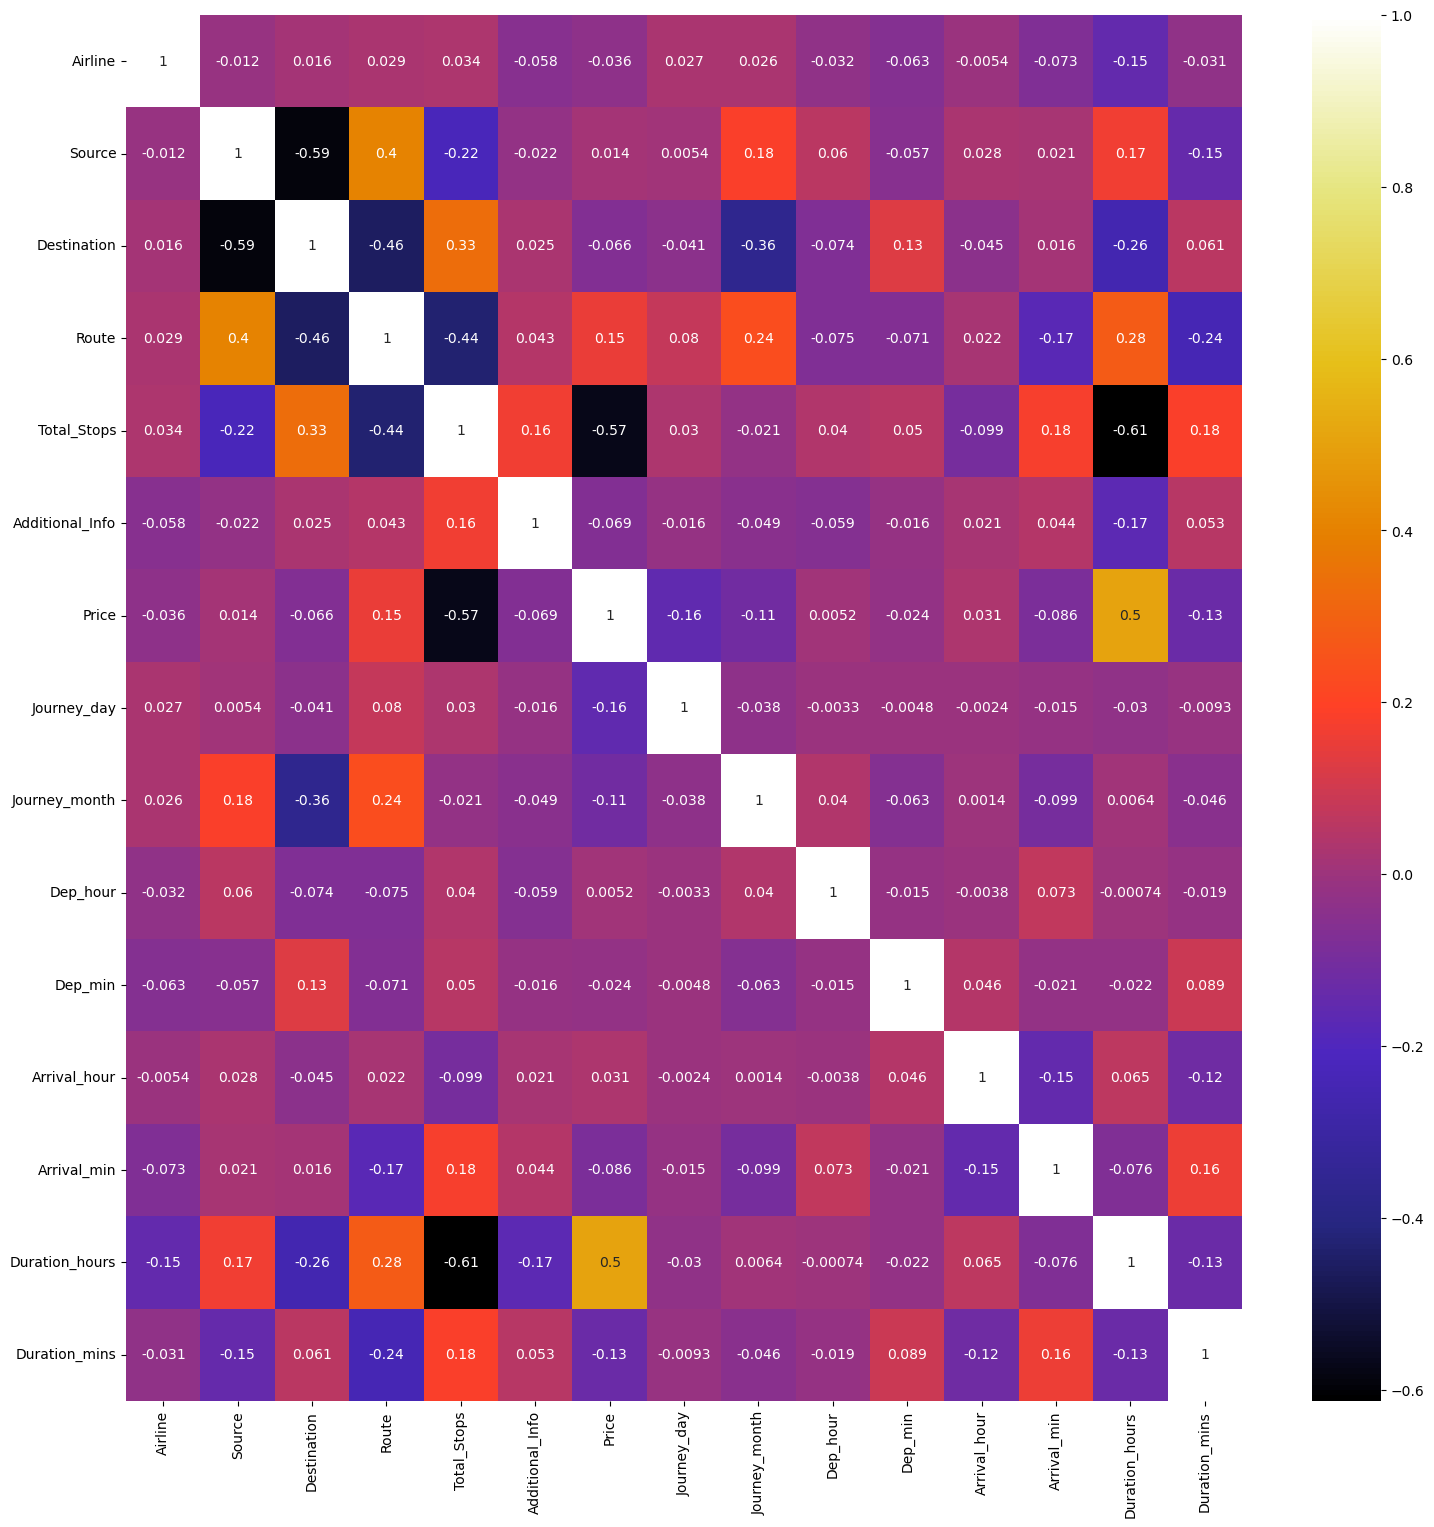

In [33]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(Flight_data.corr(), annot = True, cmap = "CMRmap")

plt.show()

In [34]:
# Calculate the correlation between 'Price' and other columns, and sort the results in ascending order
corr_data= Flight_data.corr()['Price']
print(corr_data.sort_values())

Total_Stops       -0.571947
Journey_day       -0.159009
Duration_mins     -0.131683
Journey_month     -0.113403
Arrival_min       -0.086164
Additional_Info   -0.068794
Destination       -0.065865
Airline           -0.036447
Dep_min           -0.024189
Dep_hour           0.005174
Source             0.013795
Arrival_hour       0.031043
Route              0.154311
Duration_hours     0.504090
Price              1.000000
Name: Price, dtype: float64


#  Seperating X and y variable

In [35]:
# Separating the features (X) and the target variable (y) for machine learning modeling

x=Flight_data.drop('Price',axis=1)
y=Flight_data['Price']

## Splitting final data set into Train and Test data

In [36]:
# Splitting the dataset into training and testing sets for model evaluation
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state=0)

# User defined function to calculate various Evaluation metrics

In [37]:
# Function to calculate and print various evaluation metrics for a machine learning model
def get_metrics(model):
    print(f'Train score {model.score(x_train, y_train)}')  # Training set accuracy
    print(f'Val score {model.score(x_test, y_test)}')      # Validation set accuracy

    print("MAE:", metrics.mean_absolute_error(y_test, model.predict(x_test)))  # Mean Absolute Error
    print("MSE:", metrics.mean_squared_error(y_test, model.predict(x_test)))  # Mean Squared Error
    print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, model.predict(x_test))))  # Root Mean Squared Error


# Task 2 Model Building

## 2.1 LinearRegression

In [38]:
# Import the LinearRegression class from scikit-learn
from sklearn.linear_model import LinearRegression

# Import the metrics module from scikit-learn
from sklearn import metrics

# Create a Linear Regression model
lr = LinearRegression()

# Train the Linear Regression model on the training data
lr.fit(x_train, y_train)



LinearRegression()

In [39]:

# Calculate the R-squared score on the test data
test_score = lr.score(x_test, y_test)

print("Linear Regression")

# Print the R-squared score on the test data
print("Test_score =", test_score)
# Call the get_metrics function to print additional metrics
get_metrics(lr)

Linear Regression
Test_score = 0.4372439462797819
Train score 0.41611272628951057
Val score 0.4372439462797819
MAE: 2513.8192807004198
MSE: 12945341.122713093
RMSE: 3597.9634687852367


## 2.2 DECISION TREEE

In [40]:
# Import the DecisionTreeClassifier class from scikit-learn
from sklearn.tree import DecisionTreeClassifier

# Import the metrics module from scikit-learn
from sklearn import metrics

# Create a Decision Tree Classifier model
clf = DecisionTreeClassifier()

# Train the Decision Tree Classifier model on the training data
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [41]:
# Calculate the accuracy score on the test data
test_score = clf.score(x_test, y_test)


print("Decision Tree Classifier")

# Print the accuracy score on the test data
print("Test_score =", test_score)

# Call the get_metrics function to print additional metrics
get_metrics(clf)


Decision Tree Classifier
Test_score = 0.5408504538939322
Train score 0.9835125448028674
Val score 0.5408504538939322
MAE: 830.5652173913044
MSE: 5036273.168179646
RMSE: 2244.1642471485115


## 2.3 Support Vector Machine

In [42]:
# Import the Support Vector Machine Regressor class from scikit-learn
from sklearn.svm import SVR

# Create a Support Vector Machine Regressor model
svm_regressor = SVR()

# Train the Support Vector Machine Regressor model on the training data
svm_regressor.fit(x_train, y_train)



SVR()

In [43]:
# Calculate the R-squared score on the test data
test_score_svm = svm_regressor.score(x_test, y_test)

print("Support Vector Machine")

# Print the R-squared score on the test data for the SVM model
print("Test_score =", test_score_svm)

# Call the get_metrics function to print additional metrics for the SVM model
get_metrics(svm_regressor)


Support Vector Machine
Test_score = 0.0050583321221175925
Train score 0.009608277762384154
Val score 0.0050583321221175925
MAE: 3620.0173144084515
MSE: 22887109.25939449
RMSE: 4784.047372193809


## 2.4 K-Nearest Neighbor(KNN) Algorithm  (Regressor)

In [44]:
# Import the KNeighborsRegressor class from scikit-learn
from sklearn.neighbors import KNeighborsRegressor

# Create a KNN Regressor model
knn = KNeighborsRegressor()

# Train the KNN Regressor model on the training data
knn.fit(x_train, y_train)


KNeighborsRegressor()

In [45]:
# Calculate the R-squared score on the test data
test_score = knn.score(x_test, y_test)


print("K-Nearest Neighbor (KNN) Regressor")

# Print the R-squared score on the test data
print("Test_score =", test_score)

# Call the get_metrics function to print additional metrics
get_metrics(knn)


K-Nearest Neighbor (KNN) Regressor
Test_score = 0.6874152492792192
Train score 0.7825484238280405
Val score 0.6874152492792192
MAE: 1593.406497849976
MSE: 7190533.448886765
RMSE: 2681.517005145924


## 2.5 XG Boost


In [46]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create an XGBoost Regressor
xgb_regressor = xgb.XGBRegressor()

# Train the classifier on the training data
xgb_regressor.fit(x_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [47]:

print("XGBoost Regressor")

# Get and print the evaluation metrics
get_metrics(xgb_regressor)

# Evaluate the model
test_score = xgb_regressor.score(x_test, y_test)
print("test_score=", test_score)

XGBoost Regressor
Train score 0.9743201769125074
Val score 0.872792528564145
MAE: 772.6737735345497
MSE: 2926213.0548552503
RMSE: 1710.6177407168589
test_score= 0.872792528564145



## 2.6 Random Forest

In [48]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest Regressor model on the training data
rf = RandomForestRegressor()
rf.fit(x_train, y_train)


RandomForestRegressor()

In [49]:
print("Random Forest")

# Call get_metrics to print metrics for the Random Forest model
get_metrics(rf)

# Calculate and print the test score for the Random Forest model
test_score = rf.score(x_test, y_test)
print("test_score=", test_score)

Random Forest
Train score 0.9815456727701006
Val score 0.889950019608614
MAE: 676.6326122417955
MSE: 2531531.25105724
RMSE: 1591.078643894525
test_score= 0.889950019608614


## 2.6 Random Forest Hyperparameter Tuning

In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error

# Create a RandomForestRegressor
rf = RandomForestRegressor()

# Define the hyperparameters and their possible values to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 7],
    'min_samples_leaf': [1, 2, 4],
}

# Define a scoring function (you can choose another metric if desired)
scoring = {
    'MAE': make_scorer(mean_absolute_error),
    'MSE': make_scorer(mean_squared_error),
    'RMSE': make_scorer(lambda y_true, y_pred: mean_squared_error(y_true, y_pred, squared=False)),
    'R-squared': 'r2',
}

# Create a GridSearchCV object with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring=scoring, cv=5, refit='R-squared', verbose=1, n_jobs=-1)

# Fit the GridSearchCV to your training data
grid_search.fit(x_train, y_train)

# Get the best estimator and its performance metrics
best_rf = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Evaluate the best model on the test set
test_score = best_rf.score(x_test, y_test)

# Print the results
print(f"Best parameters: {best_params}")
print(f"Best R-squared score on validation data: {best_score:.4f}")
print(f"R-squared score on test data: {test_score:.4f}")

# You can also get other metrics like MAE, MSE, and RMSE on the test set if needed
y_pred = best_rf.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"MAE on test data: {mae:.2f}")
print(f"MSE on test data: {mse:.2f}")
print(f"RMSE on test data: {rmse:.2f}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best R-squared score on validation data: 0.8749
R-squared score on test data: 0.8867
MAE on test data: 678.27
MSE on test data: 2605767.43
RMSE on test data: 1614.24


# Model Comparision Report

# Conclusion and Report on Challenges faced